## Bias Variance 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from IPython import display
import pandas as pd
from matplotlib import cm

In [3]:
import scipy.special

def fit_legendre_pinv(x_train, y_train, degree, x_min=-2, x_max=2):
    """Fit Legendre polynomial using pseudoinverse"""
    # Rescale x to [-1, 1]
    x_scaled = 2 * (x_train - x_min) / (x_max - x_min) - 1
    
    feature_degrees = np.arange(degree + 1)[:, None]
    X_train_poly = scipy.special.eval_legendre(feature_degrees, x_scaled).T
    beta_hat = np.linalg.pinv(X_train_poly) @ y_train
    return beta_hat

def eval_legendre_poly(beta, x, degree, x_min=-2, x_max=2):
    """Evaluate Legendre polynomial with given coefficients"""
    # Rescale x to [-1, 1]
    x_scaled = 2 * (x - x_min) / (x_max - x_min) - 1
    
    feature_degrees = np.arange(degree + 1)[:, None]
    X_poly = scipy.special.eval_legendre(feature_degrees, x_scaled).T
    return X_poly @ beta

In [4]:
random_seed=428
n_points=10
noise_level=0.2

In [5]:
def f(x): return 0.5*(x**2)

def get_noisy_data(n_points=10, noise_level=0.2, random_seed=428):
    np.random.seed(random_seed) 
    x=np.random.uniform(-2, 2, n_points)
    y=f(x)+noise_level*np.random.randn(n_points)
    return x,y

In [6]:
all_x = np.linspace(-2, 2, 128)
all_y = f(all_x)

n_train_points=int(np.floor(n_points*0.5))
n_test_points=n_points-n_train_points
x,y=get_noisy_data(n_points, noise_level, random_seed)
                   
x_train, y_train=x[:n_train_points], y[:n_train_points]
x_test, y_test=x[n_train_points:], y[n_train_points:]

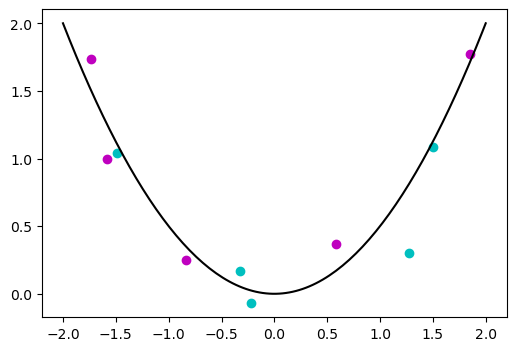

In [7]:
fig=plt.figure(0, (6, 4))
plt.plot(all_x, all_y, c='k')
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')

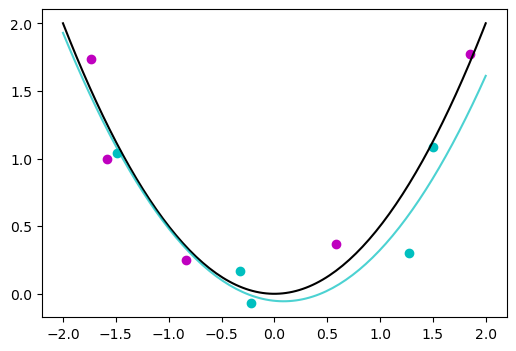

In [9]:
degree=2

# beta_hat = fit_legendre_pinv(x_train, y_train, degree)
# all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
coefficients = np.polyfit(x_train, y_train, degree)
all_y_fit = np.polyval(coefficients, all_x)


y_train_pred = np.polyval(coefficients, x_train)
y_test_pred = np.polyval(coefficients, x_test)
train_error = np.mean((y_train - y_train_pred)**2)
test_error = np.mean((y_test - y_test_pred)**2)

fig=plt.figure(0, (6, 4))
plt.plot(all_x, all_y, c='k')
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.plot(all_x, all_y_fit, color='c', label=f'Degree {degree}', alpha=0.7)

In [10]:
fits=[]
for i in range(128):
    x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
    x_train, y_train=x[:n_train_points], y[:n_train_points]
    x_test, y_test=x[n_train_points:], y[n_train_points:]

    coefficients = np.polyfit(x_train, y_train, degree)
    all_y_fit = np.polyval(coefficients, all_x)
    fits.append(all_y_fit)
fits=np.array(fits)

(-1.0, 4.0)

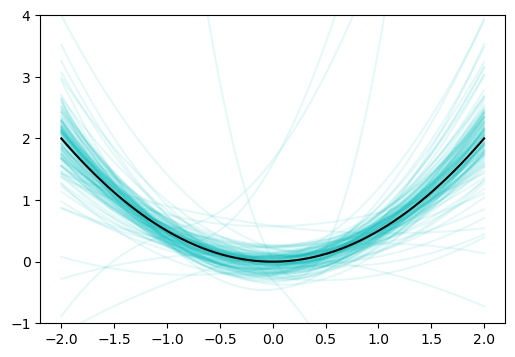

In [11]:
fig=plt.figure(0, (6, 4))
plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
plt.plot(all_x, all_y, c='k')
plt.ylim([-1, 4])

0.009612643197867905 1.3811419043823223


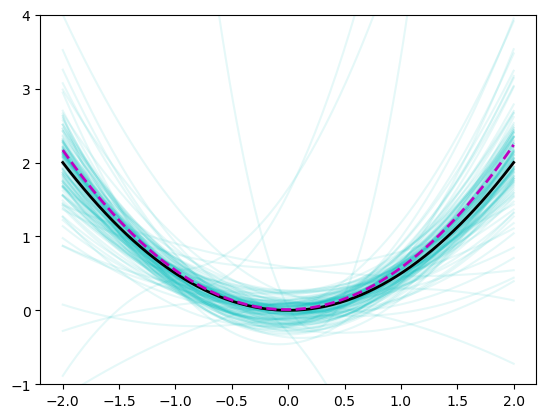

In [13]:
degree=2
n_points=10

n_train_points=int(np.floor(n_points*0.5))
n_test_points=n_points-n_train_points

fits=[]
for i in range(128):
    x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
    x_train, y_train=x[:n_train_points], y[:n_train_points]
    x_test, y_test=x[n_train_points:], y[n_train_points:]

    coefficients = np.polyfit(x_train, y_train, degree)
    all_y_fit = np.polyval(coefficients, all_x)
    fits.append(all_y_fit)
fits=np.array(fits)

mean_fit=np.mean(fits, 0)
bias=np.mean((all_y-mean_fit)**2)
variance=np.mean((fits-mean_fit)**2) 

plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
plt.plot(all_x, all_y, c='k', linewidth=2)
plt.plot(all_x, mean_fit, 'm--', linewidth=2)
plt.ylim([-1, 4])
print(bias, variance)

In [16]:
n_points=100
biases=[]
variances=[]
for degree in range(10):
    n_train_points=int(np.floor(n_points*0.5))
    n_test_points=n_points-n_train_points
    
    fits=[]
    for i in range(128):
        x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
        x_train, y_train=x[:n_train_points], y[:n_train_points]
        x_test, y_test=x[n_train_points:], y[n_train_points:]
    
        coefficients = np.polyfit(x_train, y_train, degree)
        all_y_fit = np.polyval(coefficients, all_x)
        fits.append(all_y_fit)
    fits=np.array(fits)
    
    mean_fit=np.mean(fits, 0)
    bias=np.mean((all_y-mean_fit)**2)
    variance=np.mean((fits-mean_fit)**2) 

    biases.append(bias)
    variances.append(variance)
    
    # plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
    # plt.plot(all_x, all_y, c='k', linewidth=2)
    # plt.plot(all_x, mean_fit, 'm--', linewidth=2)
    # plt.ylim([-1, 4])
    # print(bias, variance)

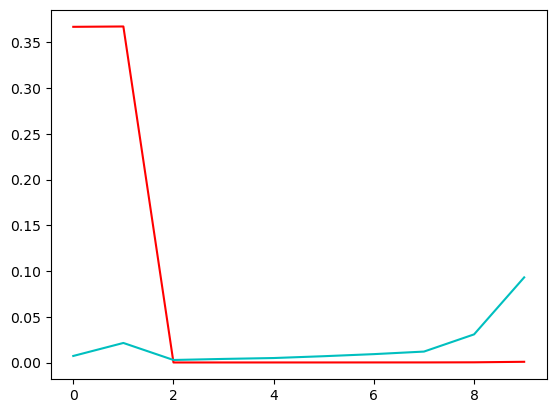

In [18]:
plt.plot(biases, 'r')
plt.plot(variances, 'c')
# plt.ylim([0, 500])